In [37]:
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in the data and getting some basic information

In [38]:
TEMP = pd.read_csv('Bias_correction_ucl.csv',index_col=['Date','station'])

In [39]:
print(TEMP.head())
print(TEMP.index)
print(TEMP.columns)

                    Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date       station                                                         
2013-06-30 1.0              28.7          21.4    58.255688    91.116364   
           2.0              31.9          21.6    52.263397    90.604721   
           3.0              31.6          23.3    48.690479    83.973587   
           4.0              32.0          23.4    58.239788    96.483688   
           5.0              31.4          21.9    56.174095    90.155128   

                    LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date       station                                                             
2013-06-30 1.0             28.074101         23.006936  6.818887   69.451805   
           2.0             29.850689         24.035009  5.691890   51.937448   
           3.0             30.091292         24.565633  6.138224   20.573050   
           4.0             29.704629         23.326177  5.650050   

In [40]:
TEMP.shape

(7752, 23)

In [41]:
TEMP.dtypes

Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

## Getting rid of the missing values

In [42]:
TEMP = TEMP.dropna()

In [43]:
TEMP.shape

(7590, 23)

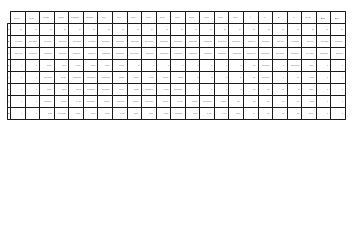

In [44]:
desc = TEMP.describe()
plot = plt.subplot(111, frame_on=False)

#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot, desc,loc='upper right')

#save the plot as a png file
plt.savefig('Temperature_Forecast.png',dpi=720)

## Plot of both output variables

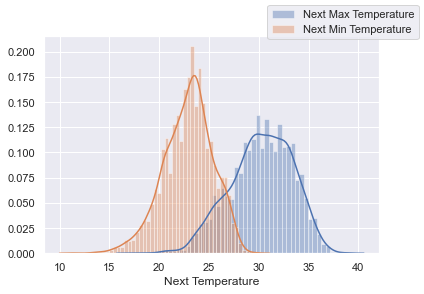

In [45]:
plot_of_TemperatureForecastMax=sns.distplot(TEMP['Next_Tmax'])
plot_of_TemperatureForecast=sns.distplot(TEMP['Next_Tmin'], axlabel='Next Temperature')
fig = plot_of_TemperatureForecastMax.get_figure()
fig = plot_of_TemperatureForecast.get_figure()
fig.legend(labels=['Next Max Temperature','Next Min Temperature'])
fig.savefig("plot_of_tempMax.png")
fig.savefig("plot_of_temp.png")
plt.show()

## Boxplot of the output: next maximum temperature

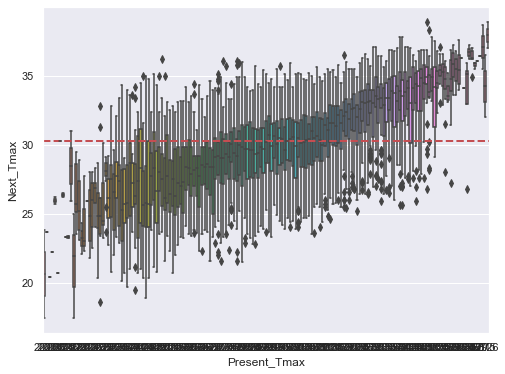

In [46]:
data_plt_max = pd.concat([TEMP['Next_Tmax'], TEMP['Present_Tmax']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Present_Tmax', y="Next_Tmax", data=data_plt_max)
plt.axhline(TEMP.Next_Tmax.mean(),color='r',linestyle='dashed',linewidth=2)
fig = fig.get_figure()
fig.savefig("boxplot_tempmax")

## Boxplot of the output: next minimum temperature

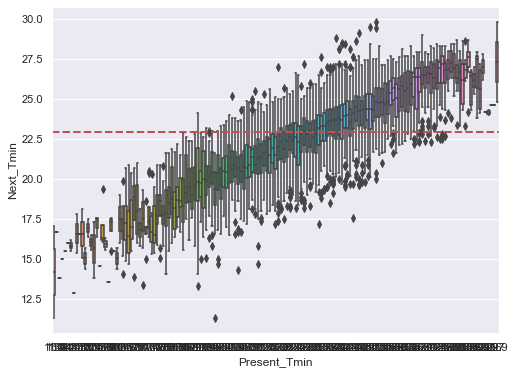

In [47]:
data_plt_min = pd.concat([TEMP['Next_Tmin'], TEMP['Present_Tmin']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Present_Tmin', y="Next_Tmin", data=data_plt_min)
plt.axhline(TEMP.Next_Tmin.mean(),color='r',linestyle='dashed',linewidth=2)
fig = fig.get_figure()
fig.savefig("boxplot_tempmin")

## Scatterplot to get an overview what else could be of interest

In [ ]:
#scatterplot
sns.set()
fig=sns.pairplot(TEMP)
plt.show()
fig=fig.fig
fig.savefig("whole_scatterplot")